# Temperature Forecast Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
d = pd.read_csv('temperature_forecast.csv')

In [3]:
df = pd.DataFrame(d)

In [4]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [5]:
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

All columns are in int or float datatype , except date

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Total number of rows = 7752

Total columns = 25

Date datatype needs to be change

Target variables : Next_Tmax , Next_Tmin 

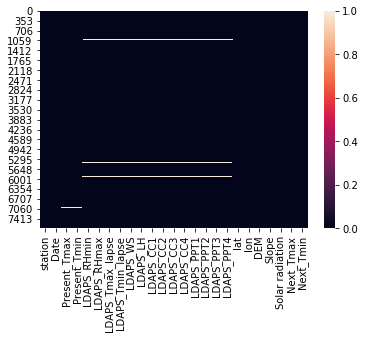

In [7]:
sns.heatmap(df.isnull())

Except lat,DEM,lon,Slope,Solar radiation each columns have null values   

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df['Month']  = df['Date'].dt.month

In [11]:
df['Year']  = df['Date'].dt.year

In [12]:
df['Day']  = df['Date'].dt.day

Date is changed to datetime type and month day and year are seperated

In [13]:
df.drop('Date',axis=1,inplace=True)

In [14]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month', 'Year', 'Day'],
      dtype='object')

In [15]:
df['Year'].value_counts()

2015.0    1550
2014.0    1550
2013.0    1550
2017.0    1550
2016.0    1550
Name: Year, dtype: int64

Dataset has record from year 2013 to 2017

In [16]:
df['Month'].value_counts()

7.0     2625
8.0     2500
6.0      375
12.0     250
11.0     250
10.0     250
9.0      250
5.0      250
4.0      250
3.0      250
2.0      250
1.0      250
Name: Month, dtype: int64

station


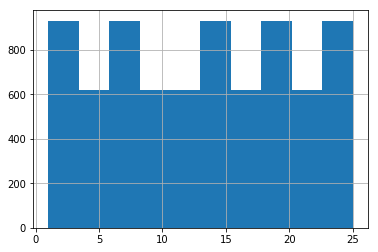

Present_Tmax


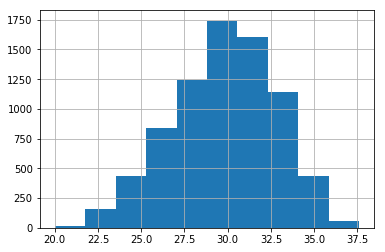

Present_Tmin


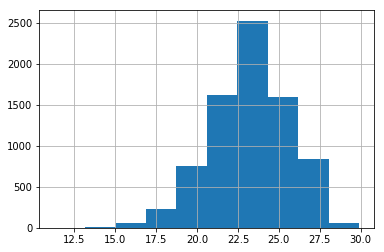

LDAPS_RHmin


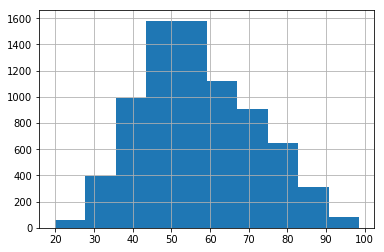

LDAPS_RHmax


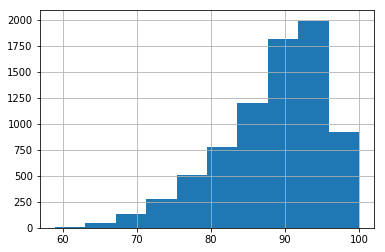

LDAPS_Tmax_lapse


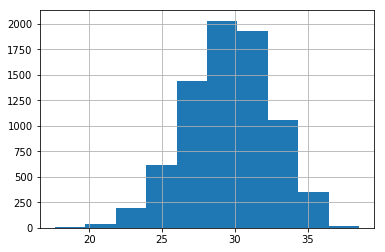

LDAPS_Tmin_lapse


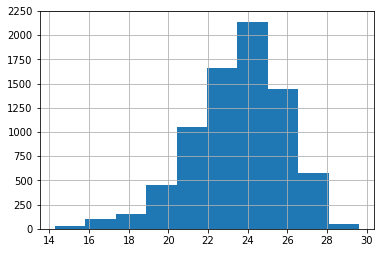

LDAPS_WS


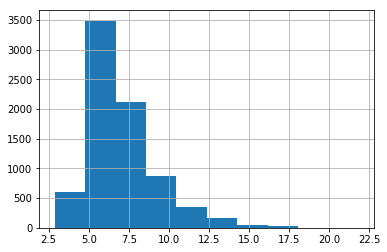

LDAPS_LH


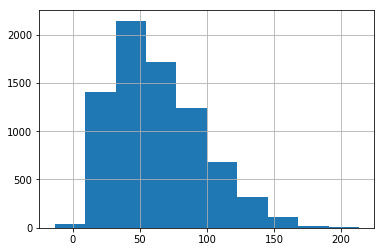

LDAPS_CC1


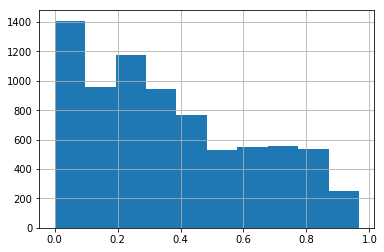

LDAPS_CC2


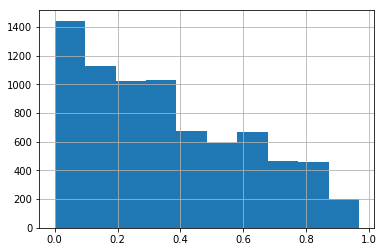

LDAPS_CC3


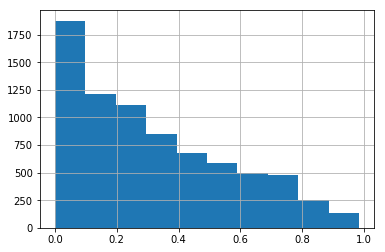

LDAPS_CC4


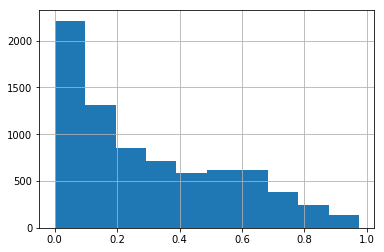

LDAPS_PPT1


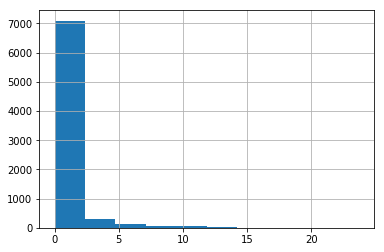

LDAPS_PPT2


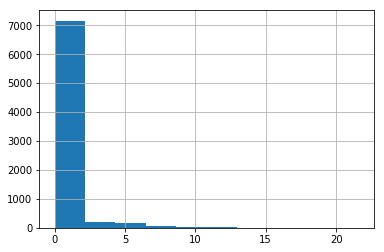

LDAPS_PPT3


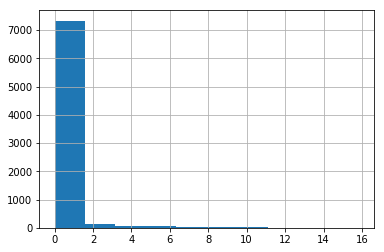

LDAPS_PPT4


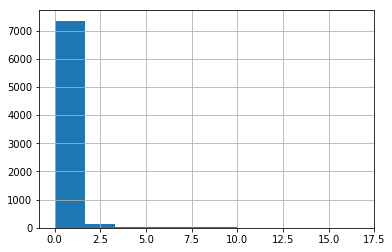

lat


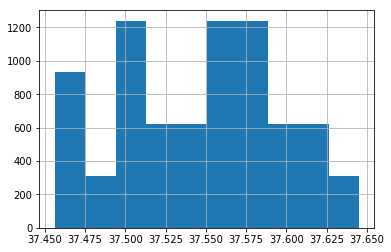

lon


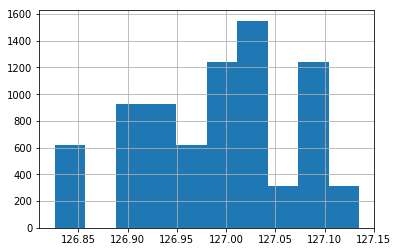

DEM


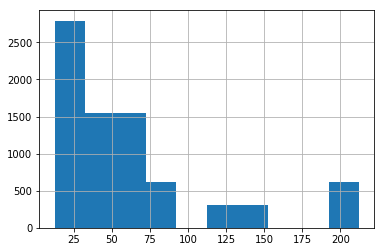

Slope


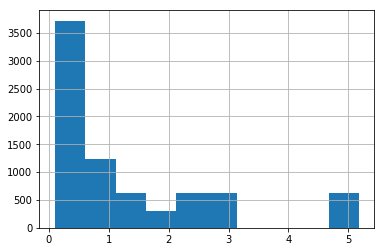

Solar radiation


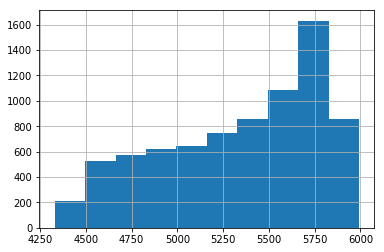

Next_Tmax


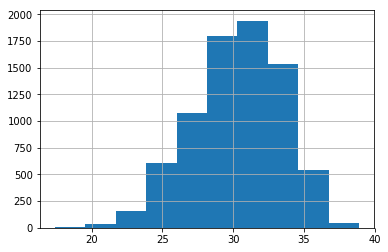

Next_Tmin


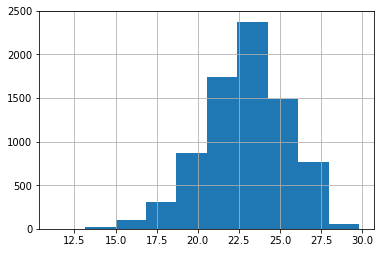

Month


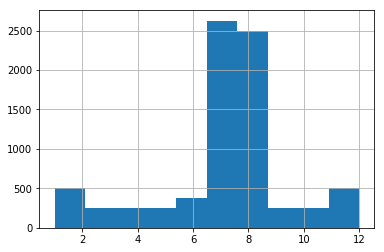

Year


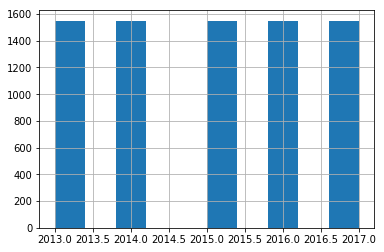

Day


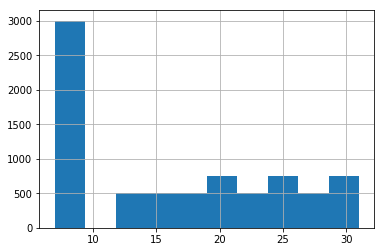

In [17]:
for i in df.columns:
    print(i)
    df[i].hist(bins=10)
    plt.show()

Present tmax ranges from 22.5 to 37.5

Present tmin ranges from 15 to 29

LDAPS_RHmin ranges from 20 to 100

LDAPS_RHmax is skewed (maximum values ranges from 85 to 95)

LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 values ranges from 2 to 4 (very less  spreaded)

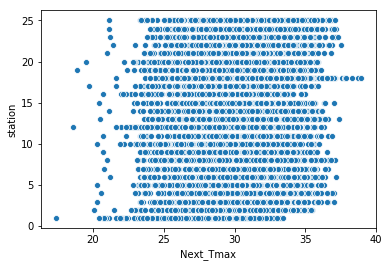

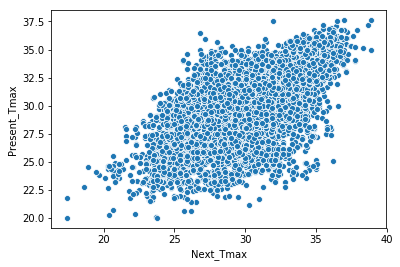

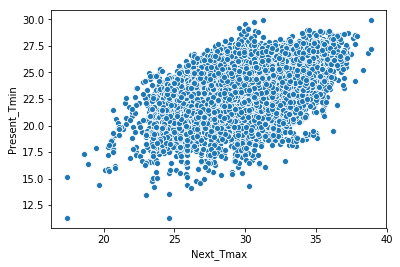

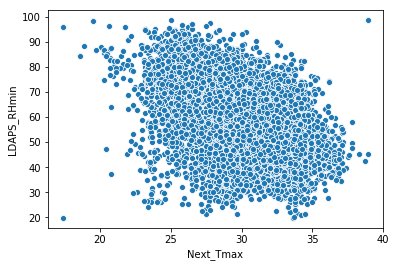

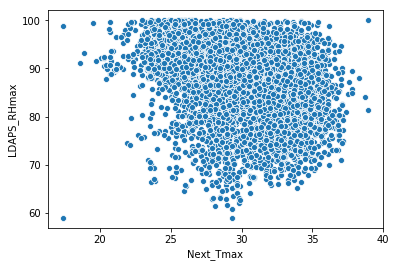

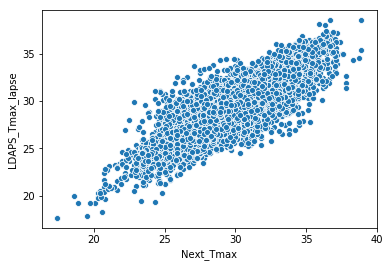

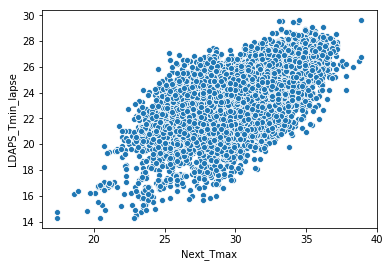

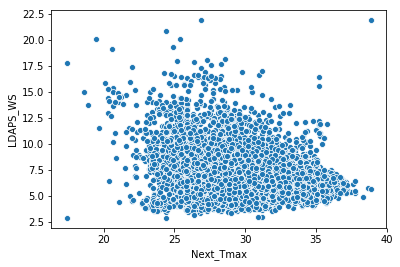

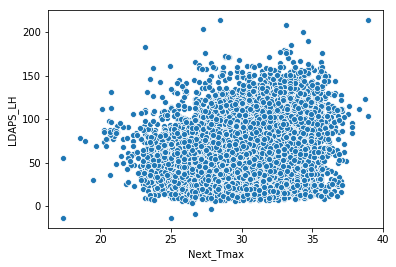

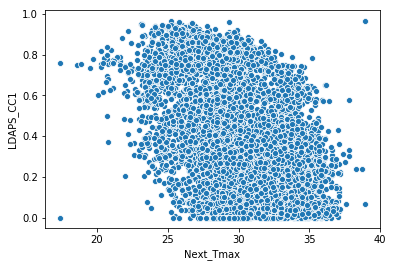

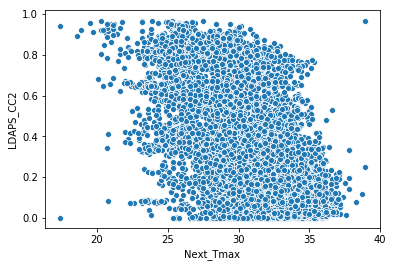

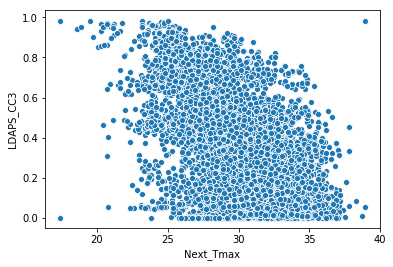

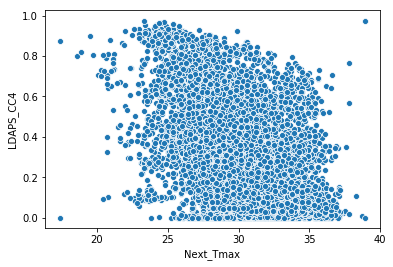

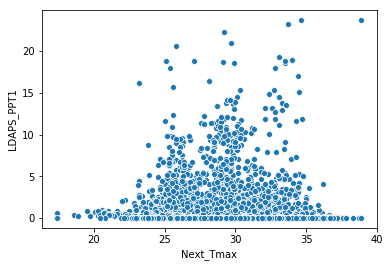

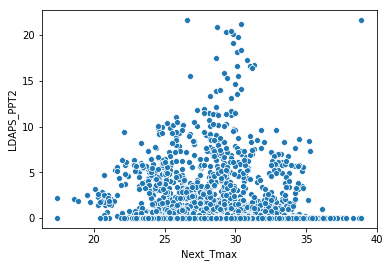

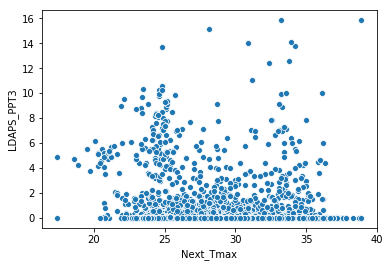

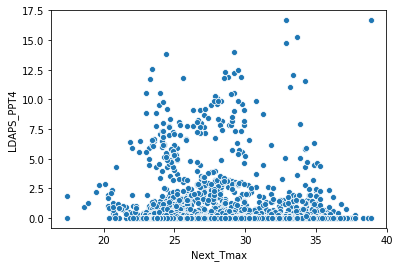

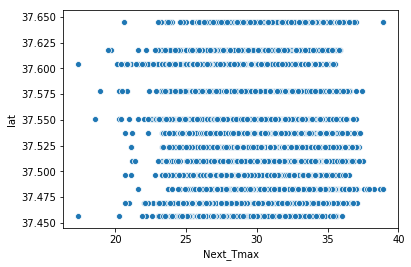

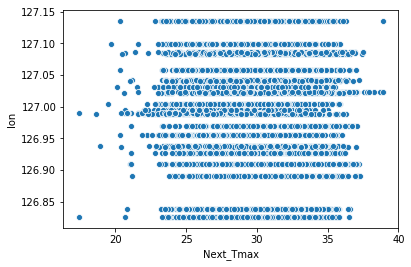

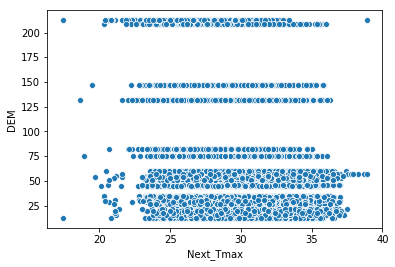

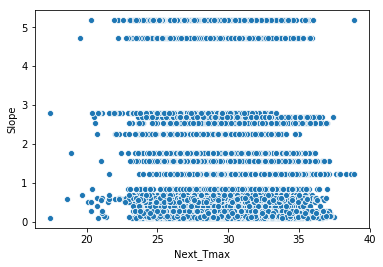

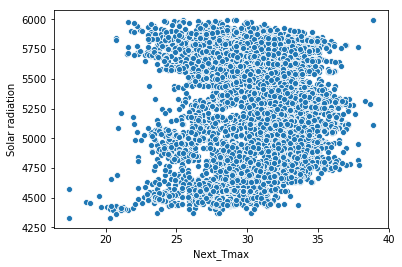

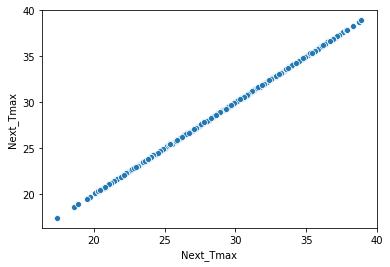

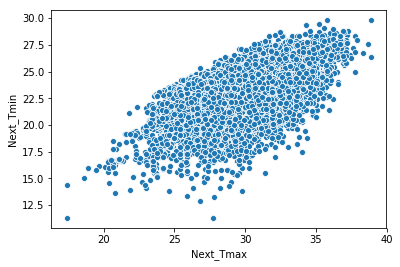

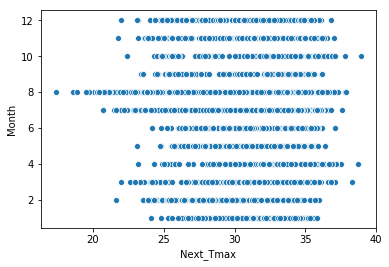

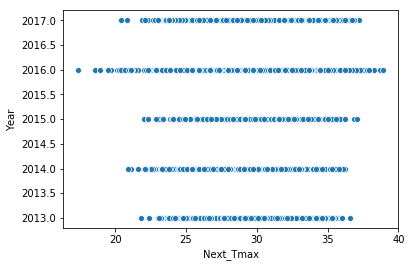

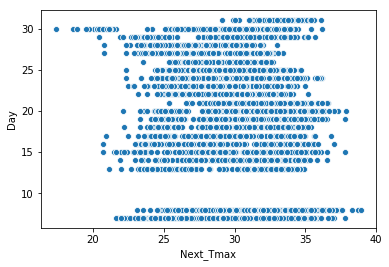

In [19]:
for i in df.columns:
    sns.scatterplot(x='Next_Tmax',y=i,data=df)
    plt.show()

Next_Tmax(one target variable) : positively correlated with Present_tmax , Present Tmin , LDAPS_Max laps ,  LDAPS_Min laps  .
    
And negatively correlated with LDAPS RHmin

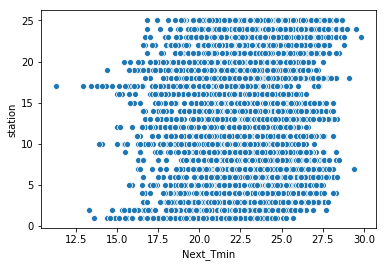

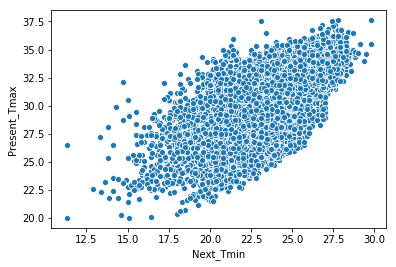

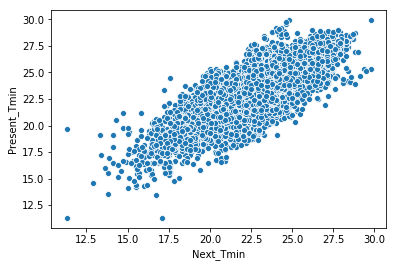

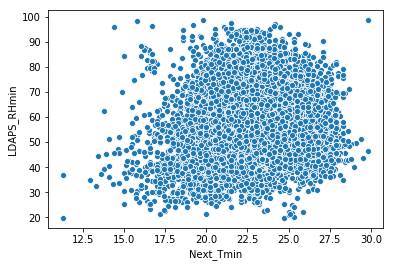

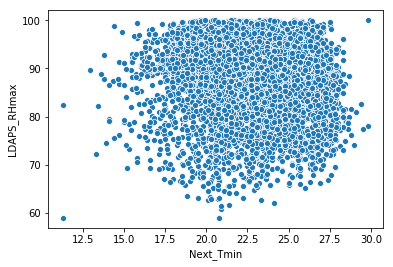

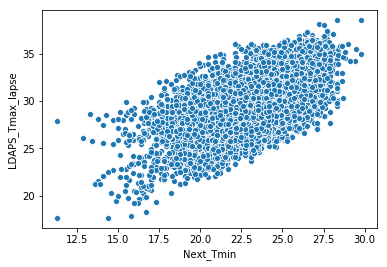

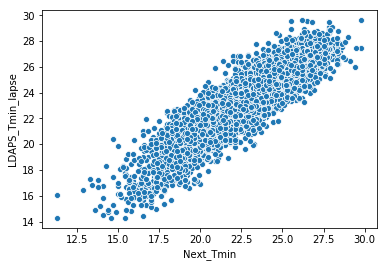

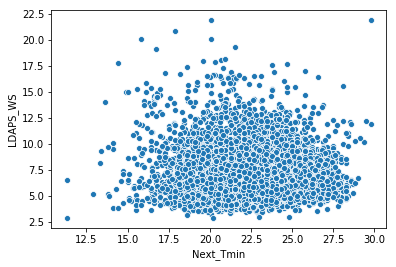

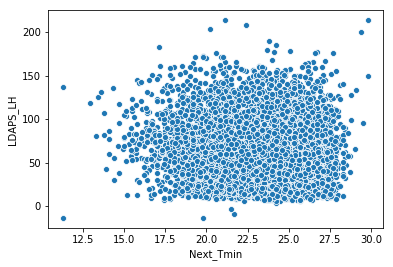

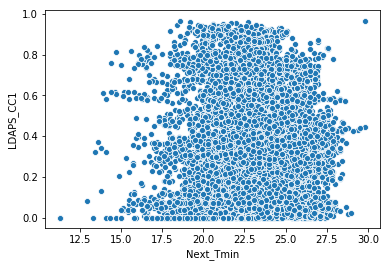

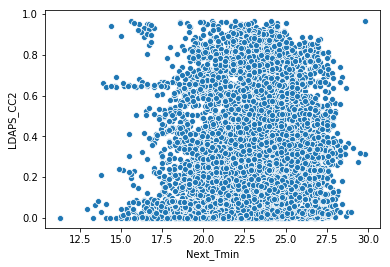

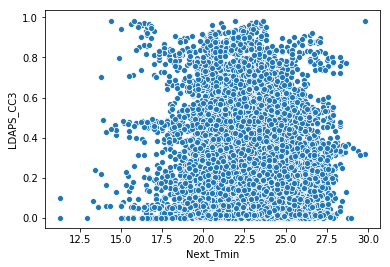

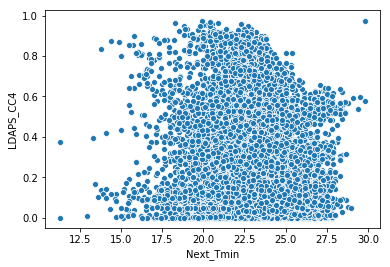

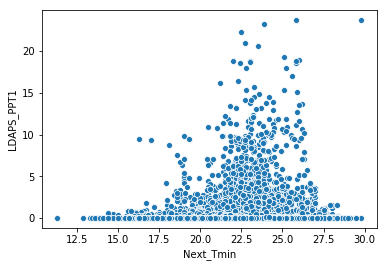

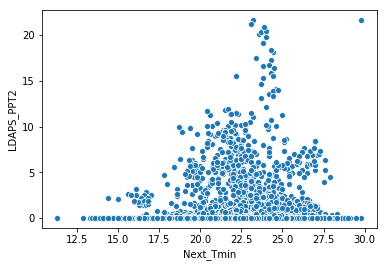

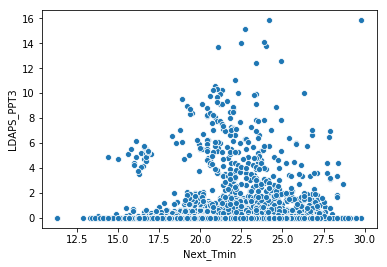

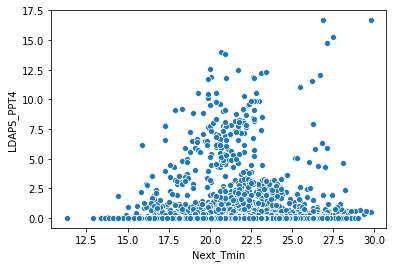

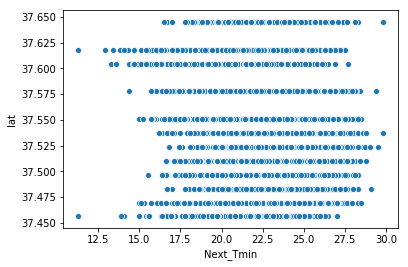

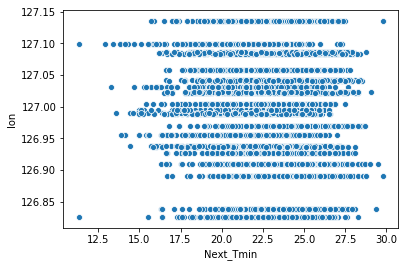

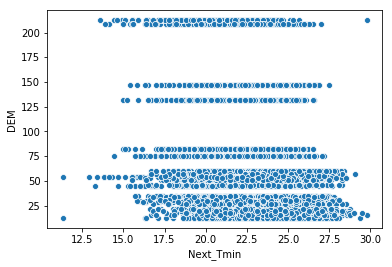

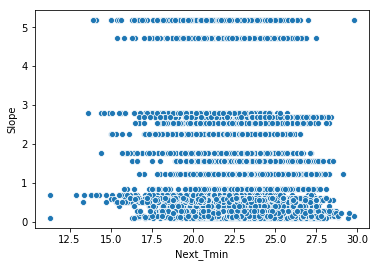

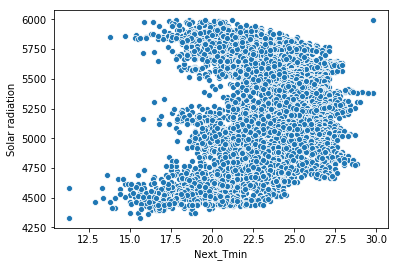

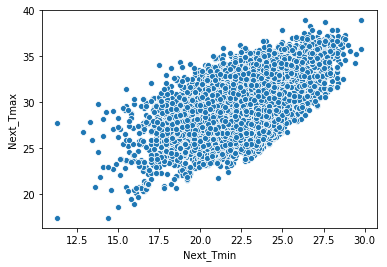

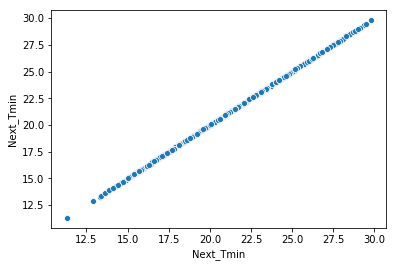

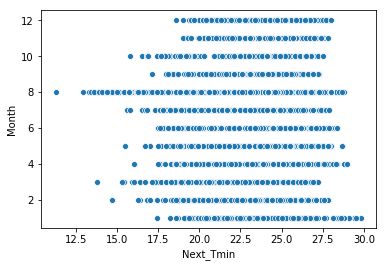

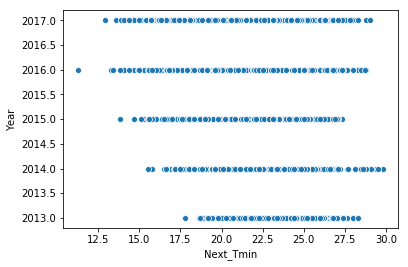

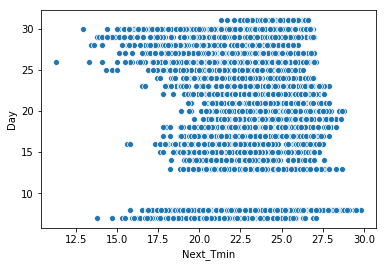

In [20]:
for i in df.columns:
    sns.scatterplot(x='Next_Tmin',y=i,data=df)
    plt.show()

Next_Tmin(one target variable) : positively correlated with Present_tmax , Present Tmin , LDAPS_Max laps , LDAPS_Min laps .

And negatively correlated with LDAPS RHmin

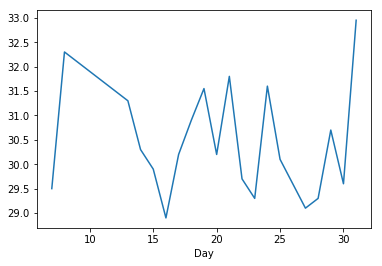

In [21]:
df.groupby('Day')['Next_Tmax'].median().plot()

Next_Tmax is minimum between 15 to 17 

and maximum in last days of the month 30/31

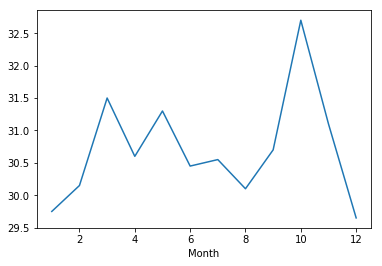

In [22]:
df.groupby('Month')['Next_Tmax'].median().plot()

Temperature is high in month of 10(Oct) and least in month of 12(Dec)

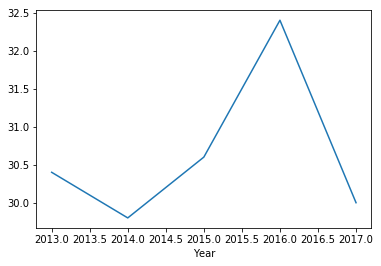

In [23]:
df.groupby('Year')['Next_Tmax'].median().plot()

Next_tmax was maximum in 2016

Next_tmax was least in 2014 

Observation :

Next_tmax was maximum between 7-10-2016 to 31-10-2016

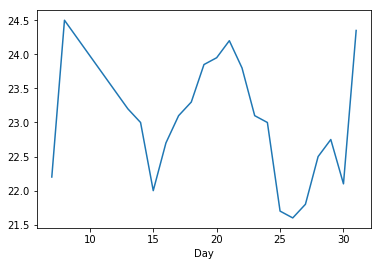

In [24]:
df.groupby('Day')['Next_Tmin'].median().plot()

Next_Tmin was minimum between 25 to 27

and maximum between 7 to 10

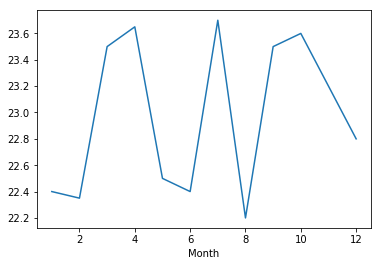

In [25]:
df.groupby('Month')['Next_Tmin'].median().plot()

Next_min is least in month=8

And maximum in month between 6 to 7

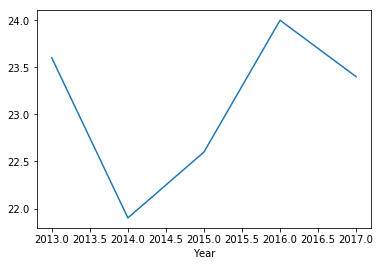

In [26]:
df.groupby('Year')['Next_Tmin'].median().plot()

Next_min is minimum in 2014 and maximum in 2016

Next_tmin was minimum between 25-8-2014 to 28-8-2014

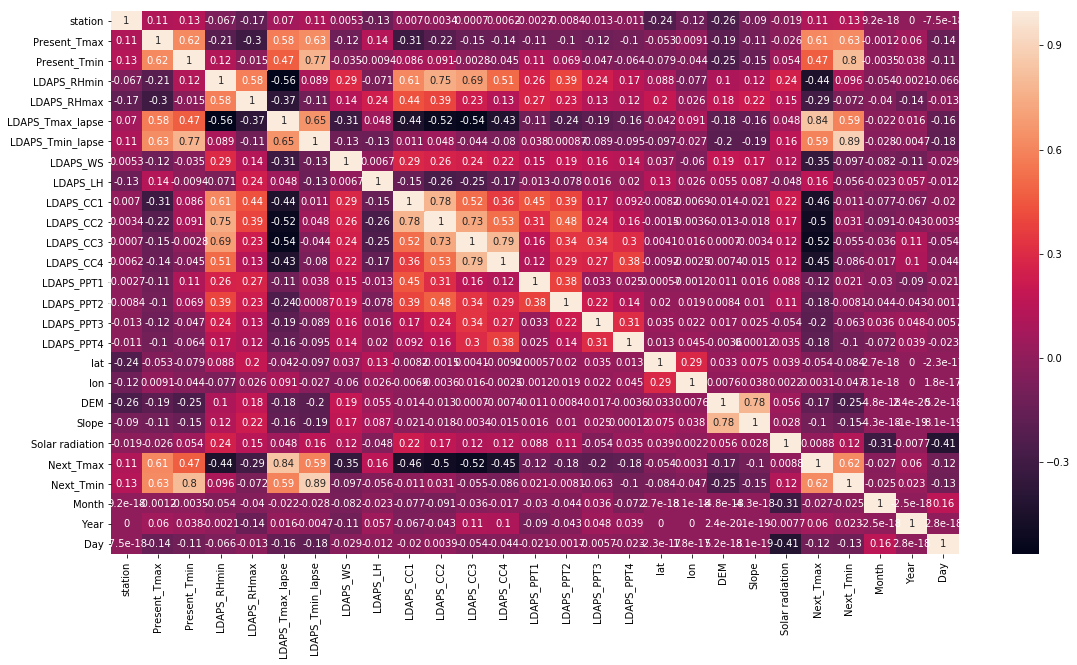

In [27]:
plt.figure(figsize=(19,10))
sns.heatmap(df.corr(),annot=True)

Next_Tmax and Next_tmin are showing almost same correlation with the independent features

Bothe are strongly correlated with LDAPS_Tmax lapse , LDAPS_Tmin lapse

And least correlated with Next_tmin with LDAPS_PPT2

and Next_Tmax with solar radiation

In [28]:
features_with_null  = [i for i in df if df[i].isnull().sum()>=1]

In [29]:
features_with_null

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'Next_Tmax',
 'Next_Tmin',
 'Month',
 'Year',
 'Day']

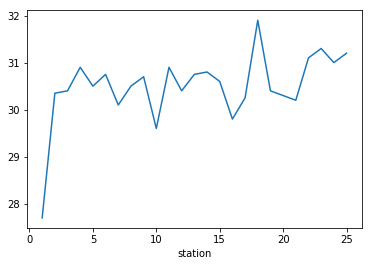

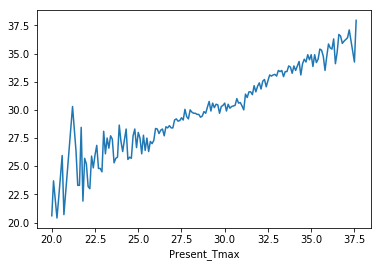

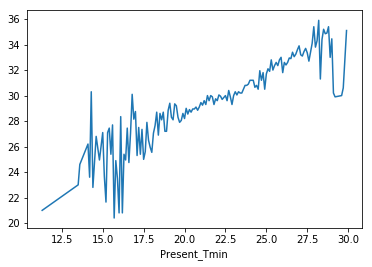

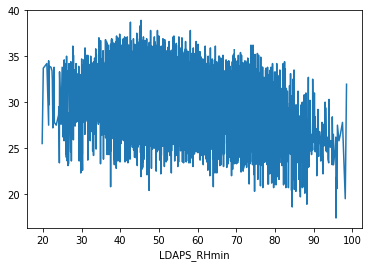

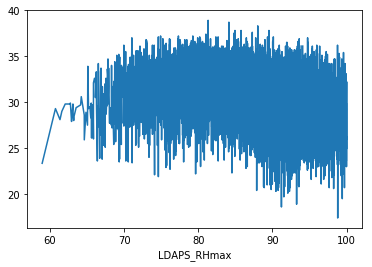

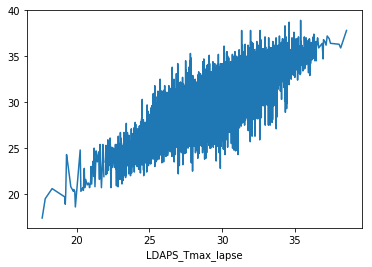

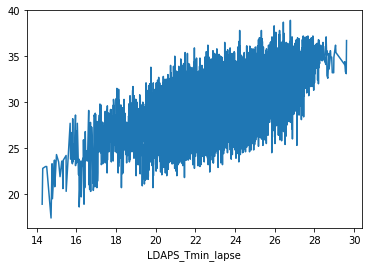

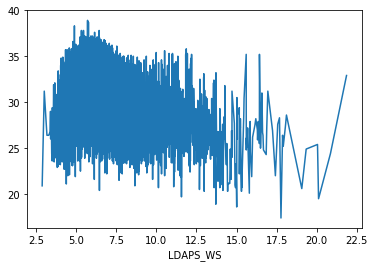

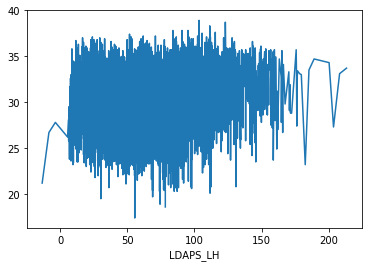

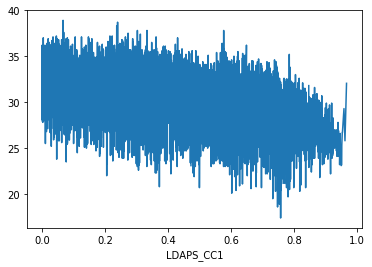

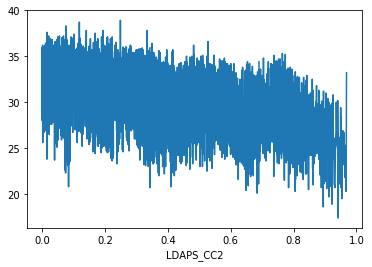

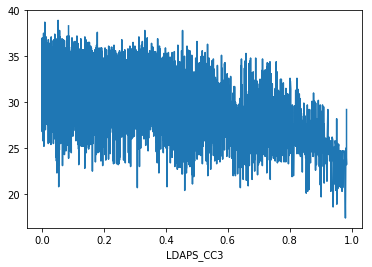

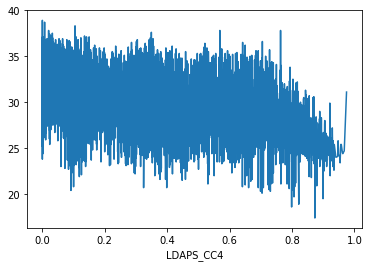

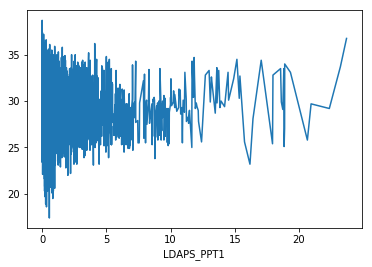

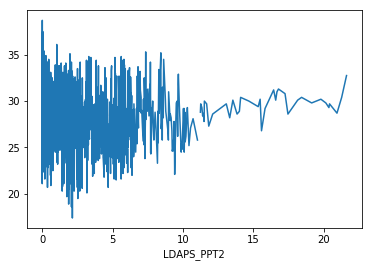

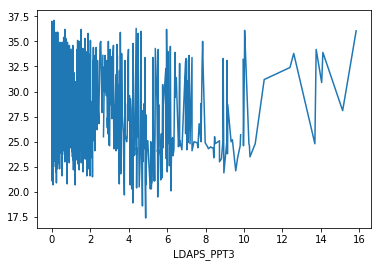

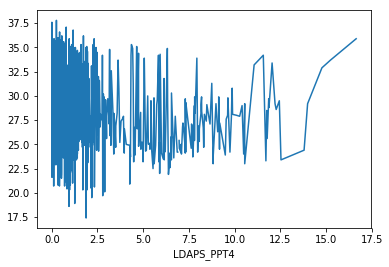

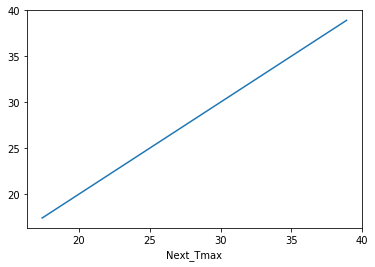

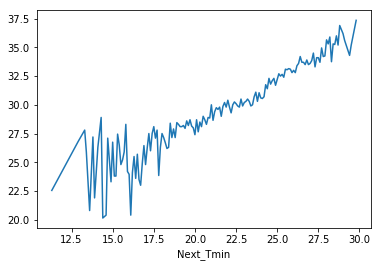

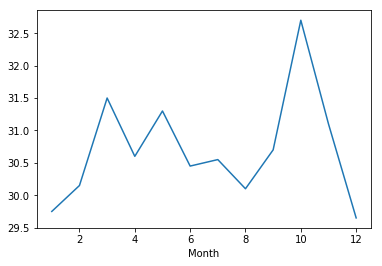

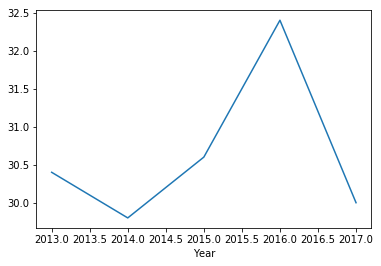

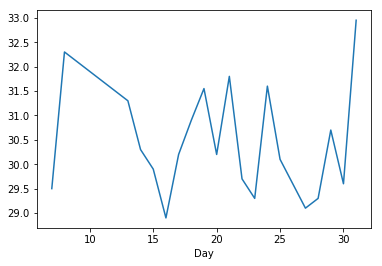

In [30]:
for f in features_with_null:
    df.groupby(f)['Next_Tmax'].median().plot()
    plt.show()

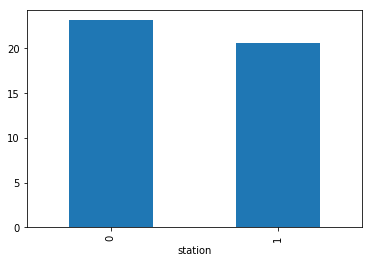

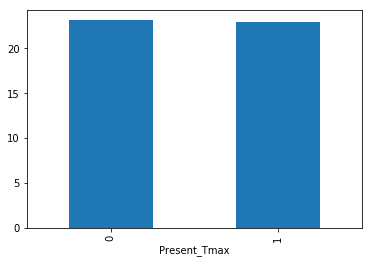

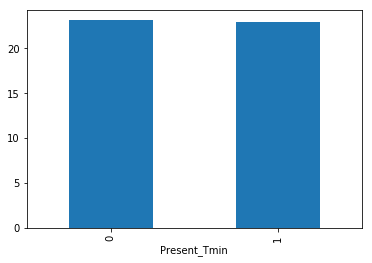

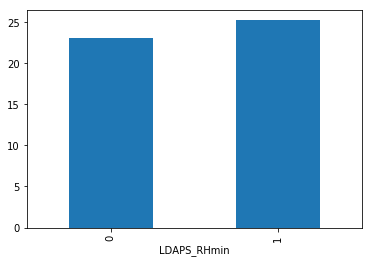

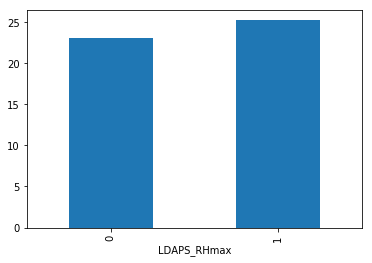

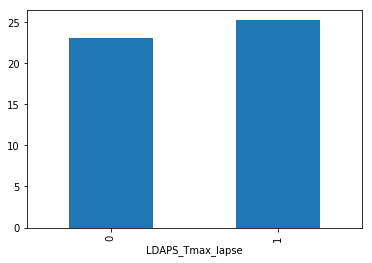

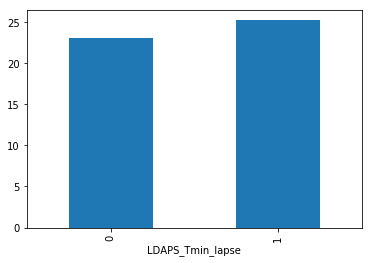

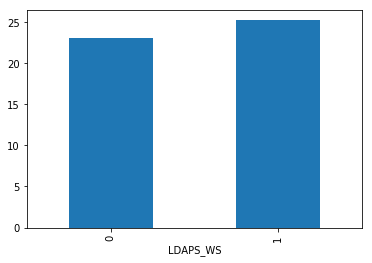

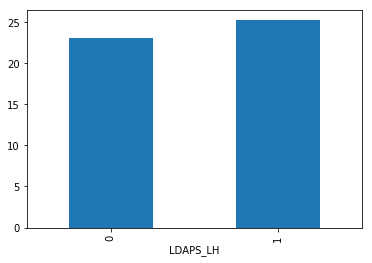

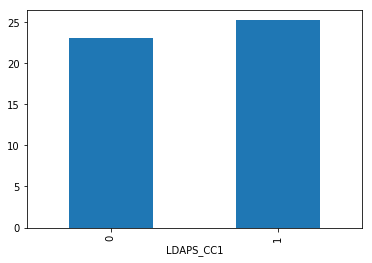

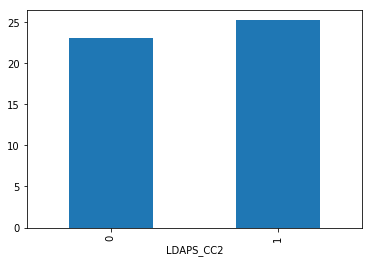

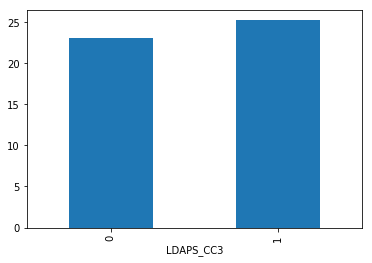

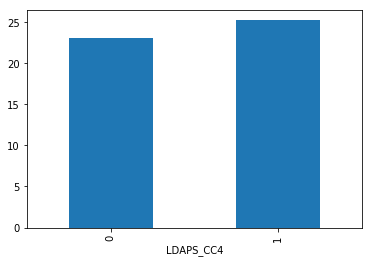

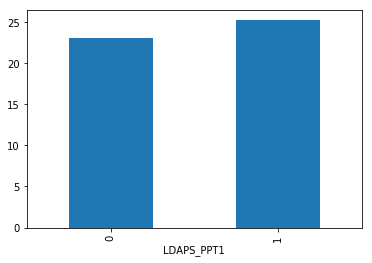

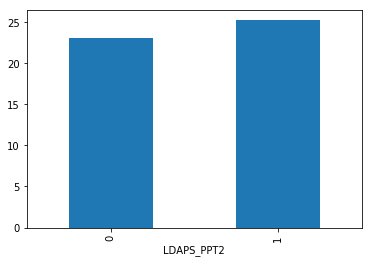

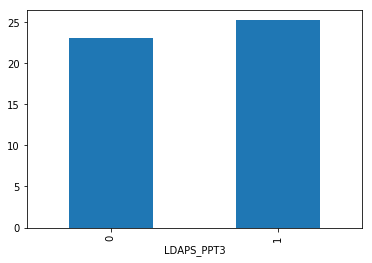

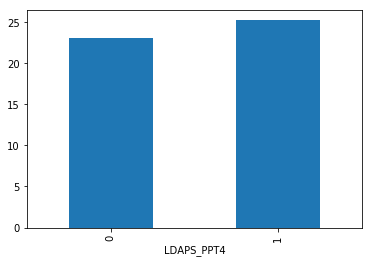

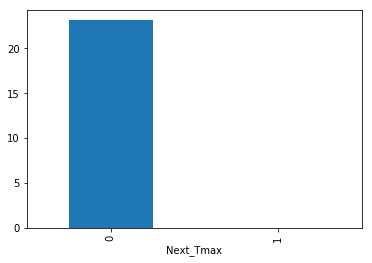

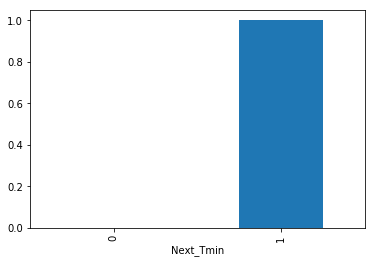

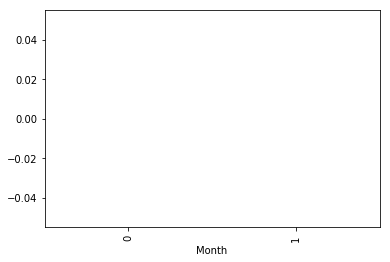

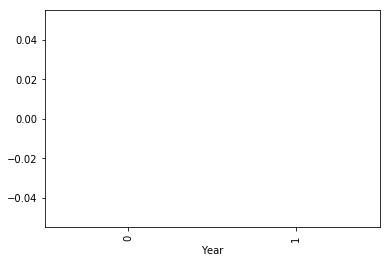

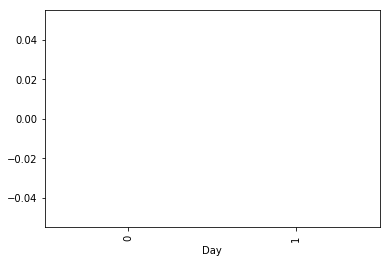

In [34]:
df1 = df.copy()
for f in features_with_null:
    df1[f] = np.where(df1[f].isnull(),1,0)
    df1.groupby(f)['Next_Tmin'].median().plot.bar()
    plt.show()

Observing the impact of null values on the target variables

The median of the target variables are less with null values and more without null values

In [49]:
data_set['Date'] = pd.to_datetime(data_set['Date'])

In [50]:
data_set['Month']  = data_set['Date'].dt.month
data_set['Day'] = data_set['Date'].dt.day
data_set['Year'] = data_set['Date'].dt.year

In [51]:
for feature in features_with_null:
    median_value = data_set[feature].median()
    data_set[feature].fillna(median_value,inplace=True)

In [54]:
data_set.drop('Date',axis=1,inplace=True)

station


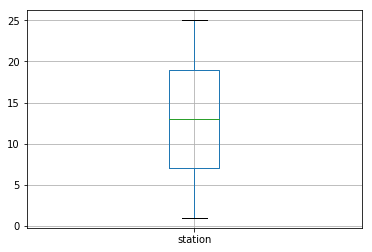

Present_Tmax


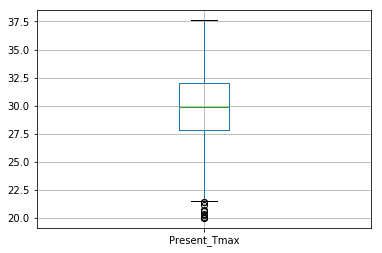

Present_Tmin


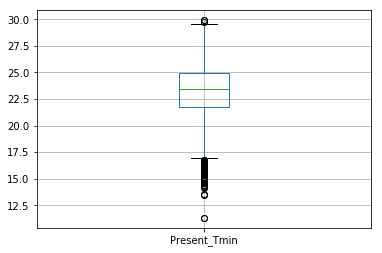

LDAPS_RHmin


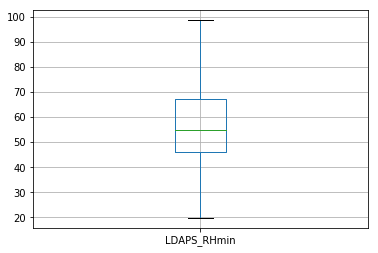

LDAPS_RHmax


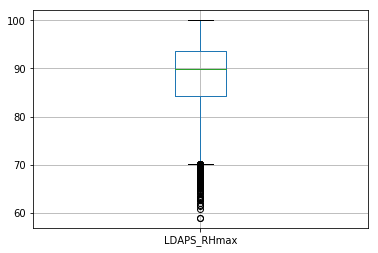

LDAPS_Tmax_lapse


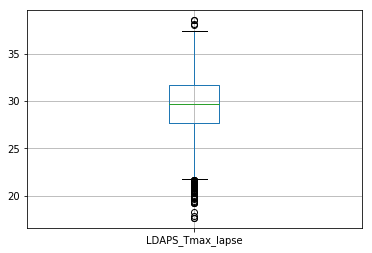

LDAPS_Tmin_lapse


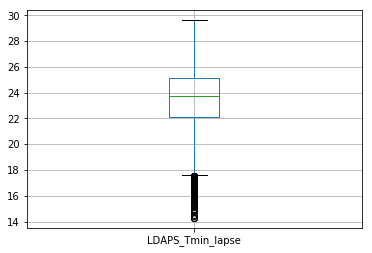

LDAPS_WS


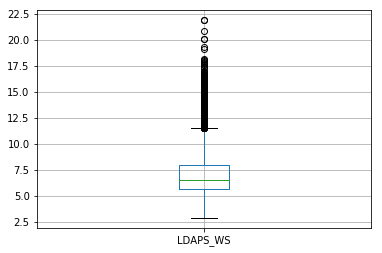

LDAPS_LH


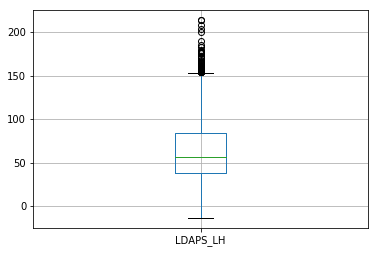

LDAPS_CC1


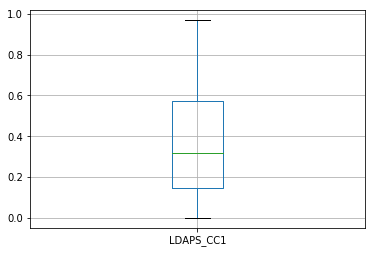

LDAPS_CC2


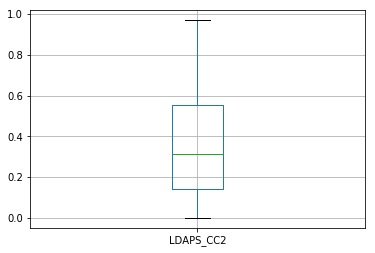

LDAPS_CC3


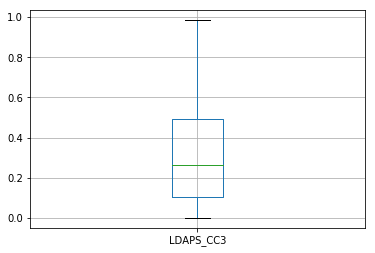

LDAPS_CC4


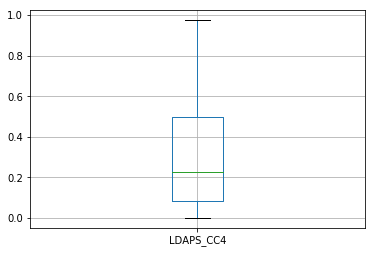

LDAPS_PPT1


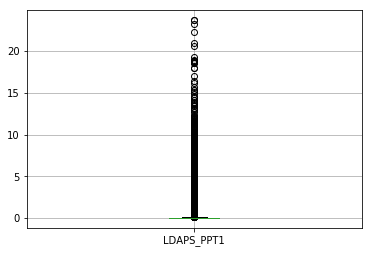

LDAPS_PPT2


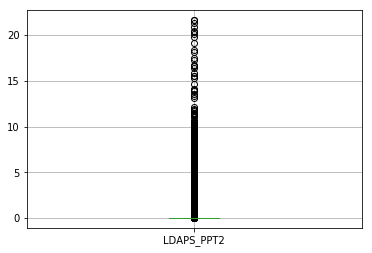

LDAPS_PPT3


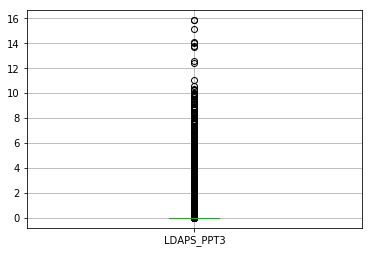

LDAPS_PPT4


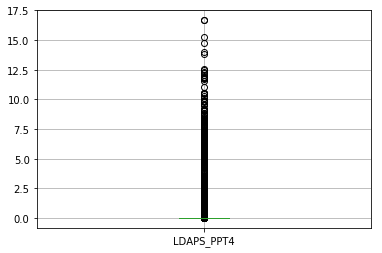

lat


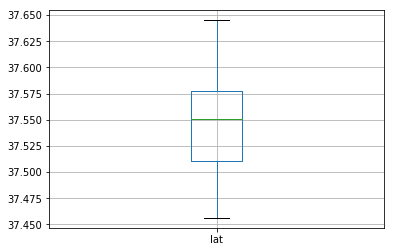

lon


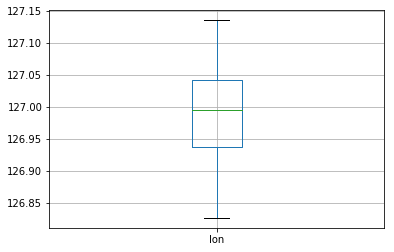

DEM


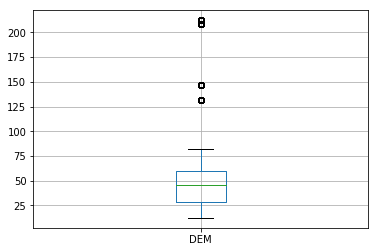

Slope


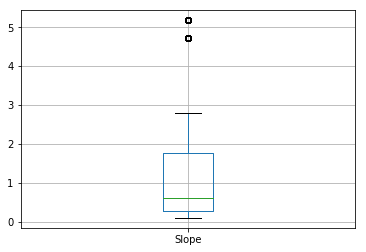

Solar radiation


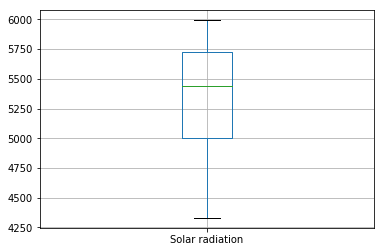

Next_Tmax


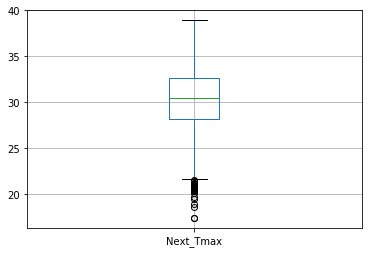

Next_Tmin


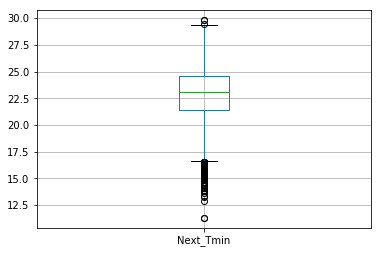

Month


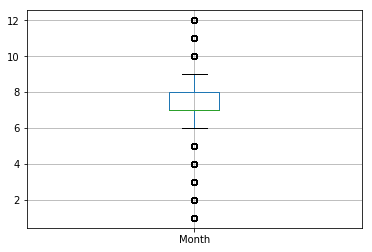

Day


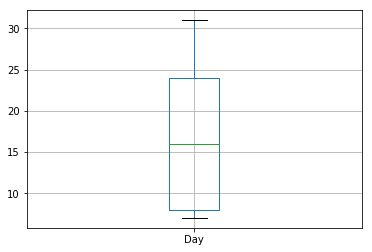

Year


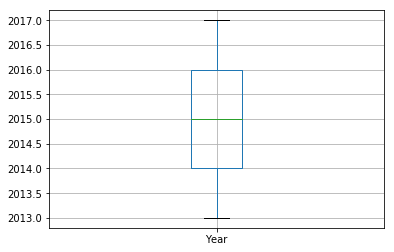

In [56]:
for i in data_set.columns:
    print(i)
    data_set.boxplot(i)
    plt.show()

LDAPS_CC1 , LDAPS_CC2, LDAPS_CC3,LDAPS_CC4 , lat , lon , solar radiation , day , year are the columns without outliers

In [57]:
from scipy.stats import zscore

In [58]:
z_score = zscore(data_set)

In [59]:
df_n = data_set[(z_score<3).all(axis=1)]

In [61]:
df_n.shape

(7021, 27)

In [62]:
data_set.shape

(7752, 27)

In [63]:
per_change = (7752-7021)/7752*100

In [64]:
per_change

9.429824561403509

Data loss after removing outliers is 9.4% therefore going ahead without removing them 

In [67]:
for i in data_set.columns:
    if(data_set[i].skew()<-0.5 or data_set[i].skew()>0.5):
        print(i,data_set[i].skew())
    else:
        pass

LDAPS_RHmax -0.860210185480212
LDAPS_Tmin_lapse -0.5847374568738013
LDAPS_WS 1.5849745667287336
LDAPS_LH 0.6783152230506901
LDAPS_CC3 0.646670357953343
LDAPS_CC4 0.6737002475545949
LDAPS_PPT1 5.395178337092725
LDAPS_PPT2 5.776834519690042
LDAPS_PPT3 6.458608442046466
LDAPS_PPT4 6.826930440956575
DEM 1.723257137053348
Slope 1.5630200000507886
Solar radiation -0.5112097190830602
Month -0.7053033785514323


Columns with skewness

LDAPS_PPT1, LDAPS_PPT2,  LDAPS_PPT3 , LDAPS_PPT4 shows very high skewness

In [69]:
data_set['LDAPS_PPT2'].value_counts()

0.000000     5226
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.085236        1
0.041993        1
0.002633        1
0.039292        1
0.109433        1
Name: LDAPS_PPT2, Length: 2510, dtype: int64

In [70]:
data_set['LDAPS_PPT1'].value_counts()

0.000000    4919
0.001953      11
0.002604       5
0.001734       3
0.000459       2
            ... 
0.935344       1
6.001337       1
0.083498       1
0.188553       1
1.229075       1
Name: LDAPS_PPT1, Length: 2812, dtype: int64

In [71]:
data_set['LDAPS_PPT3'].value_counts()

0.000000    5369
0.001953      10
0.000852       4
0.002604       3
0.000864       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.527748       1
Name: LDAPS_PPT3, Length: 2356, dtype: int64

Above columns are skewed because almost 70 to 80% of rows are 0

In [72]:
for i,j in zip(data_set['LDAPS_PPT3'],data_set['Next_Tmin']):
    if(i==0):
        print(j)
    else:
        pass

21.2
22.5
23.9
24.3
22.5
24.0
23.4
22.9
21.6
21.0
24.5
22.2
24.3
22.9
22.8
20.9
21.1
23.9
21.6
23.0
24.0
23.7
23.2
23.7
24.2
17.8
19.8
20.7
20.7
20.8
20.9
20.1
20.3
19.4
19.1
21.2
18.9
21.0
20.0
19.7
18.9
20.5
20.8
19.5
20.1
20.7
20.9
20.5
20.6
20.7
20.8
22.9
23.1
23.3
23.3
23.7
22.7
22.6
22.4
22.6
23.9
22.0
23.5
22.7
22.5
22.8
22.9
23.5
22.5
22.8
23.1
23.8
23.4
23.2
23.2
19.7
21.7
22.1
22.4
22.4
22.3
21.7
21.9
21.4
21.5
22.6
20.7
22.6
21.9
21.4
21.4
22.1
22.2
21.5
21.9
22.0
22.5
22.1
22.1
22.2
19.3
21.7
22.4
22.3
22.9
22.3
20.6
21.1
20.1
20.5
22.7
20.5
22.9
21.2
20.5
20.4
21.3
22.3
20.7
21.3
22.3
22.5
21.0
21.1
21.8
23.0
23.4
22.9
22.3
21.7
22.7
23.5
22.7
22.7
23.0
23.6
23.8
23.0
23.4
23.5
23.3
24.0
23.8
23.8
22.0
23.7
24.4
24.8
24.3
25.1
24.4
24.6
23.8
24.1
24.7
23.0
24.7
24.3
24.0
24.0
23.6
25.0
24.0
24.6
24.8
24.8
24.9
25.0
24.2
24.4
24.1
23.7
24.2
24.1
23.6
23.6
24.5
24.1
22.0
23.3
23.4
23.6
23.2
23.9
23.9
24.2
23.1
23.3
23.8
22.9
24.0
24.1
23.4
23.2
22.8
24.0
23.6
23.4
23.5
23.9


In [73]:
data_set['Next_Tmin'].min()

11.3

In [74]:
data_set['Next_Tmin'].max()

29.8

In [76]:
for i in data_set.columns:
    if(data_set[i].skew()<-0.5 or data_set[i].skew()>0.5):
        data_set[i] = np.cbrt(data_set[i])
    else:
        pass

In [79]:
for i in data_set.columns:
    if(data_set[i].skew()<-0.5 or data_set[i].skew()>0.5):
        data_set[i] = np.cbrt(data_set[i])
    else:
        pass

In [82]:
data_set.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0          28.7          21.4    58.255688     1.650946   
1      2.0          31.9          21.6    52.263397     1.649914   
2      3.0          31.6          23.3    48.690479     1.636039   
3      4.0          32.0          23.4    58.239788     1.661479   
4      5.0          31.4          21.9    56.174095     1.649002   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0         28.074101          1.416830  1.237755  4.110499   0.233947  ...   
1         29.850689          1.423728  1.213158  3.731014   0.225508  ...   
2         30.091292          1.427187  1.223377  2.740099   0.209344  ...   
3         29.704629          1.419001  1.212164  4.035663   0.216372  ...   
4         29.113934          1.420081  1.214176  4.761697   0.151407  ...   

       lat      lon       DEM     Slope  Solar radiation  Next_Tmax  \
0  37.6046  126.991  1.813669  1.120534         2.628678       29.1   
1  37.6046  127.032  1.525579  0.928740         2.622599       30.5   
2  37.5776  127.058  1.476285  0.863209         2.622313       31.1   
3  37.6450  127.022  1.529157  1.108875         2.621986       31.7   
4  37.5507  127.135  1.484621  0.927001         2.622114       31.2   

   Next_Tmin     Month   Day    Year  
0       21.2  1.220285  30.0  2013.0  
1       22.5  1.220285  30.0  2013.0  
2       23.9  1.220285  30.0  2013.0  
3       24.3  1.220285  30.0  2013.0  
4       22.5  1.220285  30.0  2013.0  

[5 rows x 27 columns]

In [83]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_set_n = pd.DataFrame(sc.fit_transform(data_set),columns=data_set.columns)

Scaling of the dataset

Trying approach 1 : building same model for both the target variable

In [86]:
x  = data_set_n.drop(['Next_Tmax','Next_Tmin'],axis=1)

In [88]:
y = data_set_n[['Next_Tmax','Next_Tmin']]

In [90]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [91]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33)

In [92]:
lr = LinearRegression()

In [126]:
lr.fit(x_train,y_train)

LinearRegression()

In [127]:
p_ = lr.predict(x_test)

In [228]:
from sklearn.metrics import r2_score

In [128]:
r2_score(p_,y_test)

0.7514248173277107

Basic model is giving r2 score of 75%

# Rough :
    
Comparing different model also for both the target variables

In [98]:
y1 = data_set_n['Next_Tmax']

In [99]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y1,test_size=.33)

In [100]:
lr.fit(x_train1,y_train1)

LinearRegression()

In [101]:
p1 = lr.predict(x_test1)

In [102]:
r2_score(p1,y_test1)

0.7195007656540274

In [103]:
y2 = data_set_n['Next_Tmin']

In [104]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y2,test_size=.33)

In [105]:
lr.fit(x_train2,y_train2)

LinearRegression()

In [106]:
p2 = lr.predict(x_test2)

In [107]:
r2_score(p2,y_test2)

0.793444077449004

Linear model is giving r2 score of 79% for Next_Tmin

and 71% for Next_Tmax

In [108]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [109]:
alg = [SVR,DecisionTreeRegressor,KNeighborsRegressor,LinearRegression]

In [112]:
for i in alg:
    x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y2,test_size=.33)
    x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y1,test_size=.33)
    obj = i()
    obj.fit(x_train1,y_train1)
    obj.fit(x_train2,y_train2)
    p1=obj.predict(x_test1)
    p2=obj.predict(x_test2)
    print(i)
    print("min",r2_score(p2,y_test2))
    print('max',r2_score(p1,y_test1))
    print('........................')

<class 'sklearn.svm._classes.SVR'>
min 0.9052729588013628
max 0.22387724109098894
........................
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
min 0.7573118596305601
max 0.20311521748138994
........................
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
min 0.831551442137551
max 0.14138334017568266
........................
<class 'sklearn.linear_model._base.LinearRegression'>
min 0.8110757016414827
max 0.14607384126989031
........................


Trying different algorithms :
SVR is giving best r2 score for Next_Tmin  : 90
    
But for Tmax no any algorithm is working well

In [132]:
from sklearn.linear_model import Lasso,Ridge

In [133]:
lasso = Lasso()
lasso.fit(x_train,y_train)

Lasso()

In [134]:
pred_lasso = lasso.predict(x_test)

In [139]:
r2_score(pred_lasso,y_test)

-1.9082801789523603e+32

In [136]:
ridge = Ridge()
ridge.fit(x_train,y_train)

Ridge()

In [137]:
pred_rid = ridge.predict(x_test)

In [138]:
r2_score(pred_rid,y_test)

0.7513706269230588

In [140]:
ridge.fit(x_train1,y_train1)

Ridge()

In [141]:
pred = ridge.predict(x_test1)

In [142]:
r2_score(pred,y_test1)

0.6881761134761945

In [143]:
lr.fit(x_train1,y_train1)

LinearRegression()

In [144]:
pred_lr = lr.predict(x_test1)

In [145]:
r2_score(pred_lr,y_test1)

0.6882406873899463

In [229]:
for i in alg:
    x_train2,x_test2,y_train2,y_test2 = train_test_split(x,y2,test_size=.33,random_state=7)
    obj = i()
    cross_score = cross_val_score(obj,x,y2,cv=5)
    obj.fit(x_train2,y_train2)
    p2=obj.predict(x_test2)
    print(i)
    print("r2score",r2_score(p2,y_test2))
    print("cross score",cross_score.mean())
    print('........................')

<class 'sklearn.svm._classes.SVR'>
r2score 0.9179772227902779
cross score 0.6689612722774785
........................
<class 'sklearn.tree._classes.DecisionTreeRegressor'>
r2score 0.7661114760582117
cross score 0.557112550187864
........................
<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
r2score 0.8373725047359091
cross score 0.5492225098773662
........................
<class 'sklearn.linear_model._base.LinearRegression'>
r2score 0.7955324202253046
cross score 0.7605245563623242
........................


 Linear regression is giving Least difference between cross val score and r2 score for Next_Tmin 

In [146]:
from sklearn.metrics import mean_squared_error

In [155]:
ridge.fit(x_train,y_train)
pred_r = ridge.predict(x_test)

In [156]:
r2_score(pred_r,y_test)

0.7410123138777192

In [158]:
from sklearn.linear_model import RidgeCV

In [163]:
rig_cv = RidgeCV(alphas=[0.01,0.001,0.1,1,10]).fit(x_train1,y_train1)

In [164]:
pred_Cv=rig_cv.predict(x_test1)

In [165]:
r2_score(pred_Cv,y_test1)

0.6881761134609052

In [168]:
from sklearn.model_selection import cross_val_score

In [173]:
rig_cv_min = RidgeCV(alphas=[0.01,0.001,0.1,1,10]).fit(x_train2,y_train2)

In [174]:
pred_min = rig_cv_min.predict(x_test2)

In [175]:
r2_score(pred_min,y_test2)

0.795087351153625

In [177]:
rig_cv_ = RidgeCV(alphas=[0.01,0.001,0.1,1,10]).fit(x_train,y_train)

In [178]:
pred_b = rig_cv_.predict(x_test)

In [180]:
r2_score(pred_b,y_test)

0.7404937165539242

# Conclusion:
    
Trying linear regression for individual model and same model with hyper parametric tuning also

r2 score is 0.79 for Tmin and 0.68 for Tmax

And for same model 0.75

Other algorithms:
    
SVR is giving 0.90 r2 score for Tmin but that model was overfitted

So moving with building one model for both the target variable

In [231]:
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=i)
    lr =  LinearRegression()
    lr.fit(x_train,y_train)
    pred_test = lr.predict(x_test)
    pred_train = lr.predict(x_train)
    if(round(mean_squared_error(pred_test,y_test)*100,1)==round(mean_squared_error(pred_train,y_train)*100,1)):
        print('random state',i)
        print('test mse',mean_squared_error(pred_test,y_test))
        print('train mse',mean_squared_error(pred_train,y_train))

random state 7
test mse 0.20317253205996122
train mse 0.20327012508929404
random state 16
test mse 0.20319824628142547
train mse 0.2031407491467504
random state 37
test mse 0.20288865954997462
train mse 0.2033586925079482
random state 40
test mse 0.20327450531576874
train mse 0.20341084144230626
random state 86
test mse 0.2028841704451846
train mse 0.20335643467663056
random state 93
test mse 0.2034344693309259
train mse 0.20311277042841436


In [232]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=7)

In [233]:
y_train.head()

Next_Tmax  Next_Tmin
4302   0.616301   0.268691
4714  -1.081120  -0.979731
1085   1.833320   1.194939
7083   1.993454   1.839285
6493   0.392114   0.228419

# Ensemble technique

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [202]:
random_reg = RandomForestRegressor()

In [183]:
random_reg.fit(x_train,y_train)

RandomForestRegressor(random_state=100)

In [184]:
pred_ran = random_reg.predict(x_test)

In [186]:
r2_score(pred_ran,y_test) 

0.8766191546843967

r2 score of random fforest is 0.87

# Hyper Parametric Tuning

In [196]:
from sklearn.model_selection import GridSearchCV

In [206]:
para_rf = {
    'n_estimators' : [100,200,300,500],
    'max_depth' : [10,20,30],
    'bootstrap' : [True,False]
}

In [207]:
grid_ran = GridSearchCV(estimator=random_reg,param_grid=para_rf,cv=3)

In [208]:
grid_ran.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'n_estimators': [100, 200, 300, 500]})

In [209]:
print(grid_ran.best_params_)

{'bootstrap': True, 'max_depth': 30, 'n_estimators': 500}


In [210]:
print(grid_ran.best_score_)

0.8815115063277402


# Best score is 0.88

In [215]:
grid_ran_best = RandomForestRegressor(n_estimators = 500,max_depth=30,bootstrap=True)

Fitting best model

In [216]:
grid_ran_best.fit(x_train,y_train)
pred_grid_best = grid_ran_best.predict(x_test)

r2 score and MSE of the model

In [217]:
print('r2 score of best model',r2_score(pred_grid_best,y_test))
print('mean_squared_error',mean_squared_error(pred_grid_best,y_test))
print('root mean_squared_error',np.sqrt(mean_squared_error(pred_grid_best,y_test)))

r2 score of best model 0.8769815649564981
mean_squared_error 0.10074629221033132
root mean_squared_error 0.31740556423971417


Saving the model

In [218]:
import pickle 

In [219]:
temp_forecast = 'temp.pkl'

In [220]:
pickle.dump(grid_ran_best,open(temp_forecast,'wb'))

In [235]:
df_pred = pd.DataFrame(pred_grid_best)

In [236]:
df_pred # predicted values 0:next_Tmax , 1:Next_Tmin

0         1
0    -0.342774  0.509757
1     0.229546  0.187664
2    -1.878267 -0.054852
3     0.697970  1.390176
4     0.316338 -0.583055
...        ...       ...
2554 -0.287816  0.384512
2555  0.167606 -0.009345
2556  0.267786  0.195960
2557  0.214941  0.420837
2558 -0.304470  0.985929

[2559 rows x 2 columns]